<a href="https://colab.research.google.com/github/Jonnytan555/ML_for_Finance/blob/main/Monte_Carlo_Simulation_of_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libaries

from datetime import datetime 
import numpy as np 
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
#List stocks and ticker

stock_symbols = ["AAPL"]

In [ ]:
#Set and start and end date
start_date = '2017-01-03'
end_date = datetime.today().strftime("%Y-%m-%d")

print(end_date)

2020-09-18


In [ ]:
#Get Prices from web 

def GetPrices(stocks=stock_symbols, start=start_date, end=end_date, col='Adj Close'):
    data = web.DataReader(stocks, data_source='yahoo',start=start, end=end)[col]
    return data

In [ ]:
#Display stock Prices

GetPriceData = GetPrices(stock_symbols)
GetPriceData

Symbols,AAPL
Date,
2017-01-03,27.548414
2017-01-04,27.517582
2017-01-05,27.657520
2017-01-06,27.965857
2017-01-09,28.222006
...,...
2020-09-14,115.360001
2020-09-15,115.540001
2020-09-16,112.129997


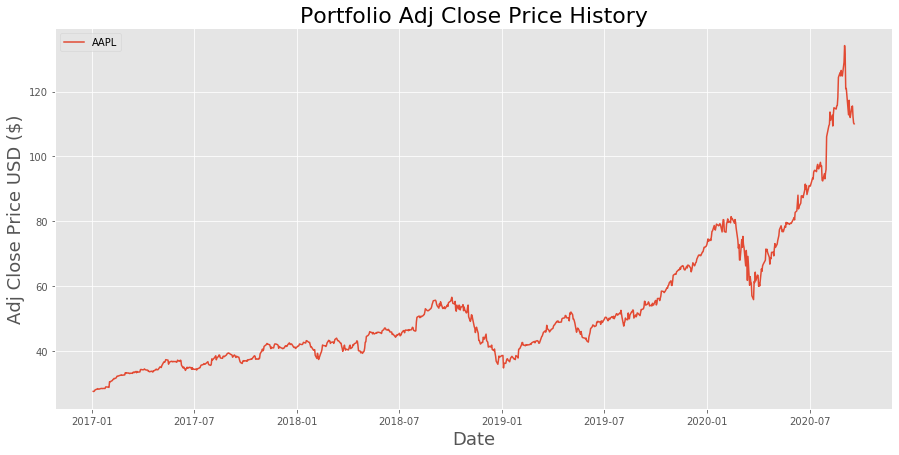

In [ ]:
#Visualise results 
def showGraph(stocks=stock_symbols, start=start_date, end=end_date, col ='Adj Close'):
    
    #Create title
    title = 'Portfolio '+col+' Price History'
    
    #Get Portfolio info from previous function
    
    my_stocks = GetPrices(stocks = stocks, start=start, end=end, col=col)
    
    #Plot the initial base graph setup
    
    plt.figure(figsize=(15,7))
    
    #loop through each of your Stocks and plot the results
    
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c],label=c)
        
    plt.title(title, fontsize = 22)
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel(col+' Price USD ($)', fontsize=18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()
                              
        
showGraph(stock_symbols)

In [ ]:
#Get Estimated Daily Returns

returns = GetPriceData.pct_change()
returns

Symbols,AAPL
Date,
2017-01-03,NaN
2017-01-04,-0.001119
2017-01-05,0.005085
2017-01-06,0.011148
2017-01-09,0.009159
...,...
2020-09-14,0.030000
2020-09-15,0.001560
2020-09-16,-0.029514


In [ ]:
#Get Last Price

#prices = web.DataReader('AAPL','yahoo', start_date, end_date)['Adj Close']
#prices[-1]

last_price = GetPriceData['AAPL'][-1]
last_price

110.0199966430664

In [ ]:
#Set number of simulations
num_simulations = 1000
num_days = 252 #252 trading days in a year

simulation_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    daily_vol = returns.std() #standard deviation
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol)) #random shock added
    price_series.append(price)
    
    for y in range(num_days):
        if count == 251:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series

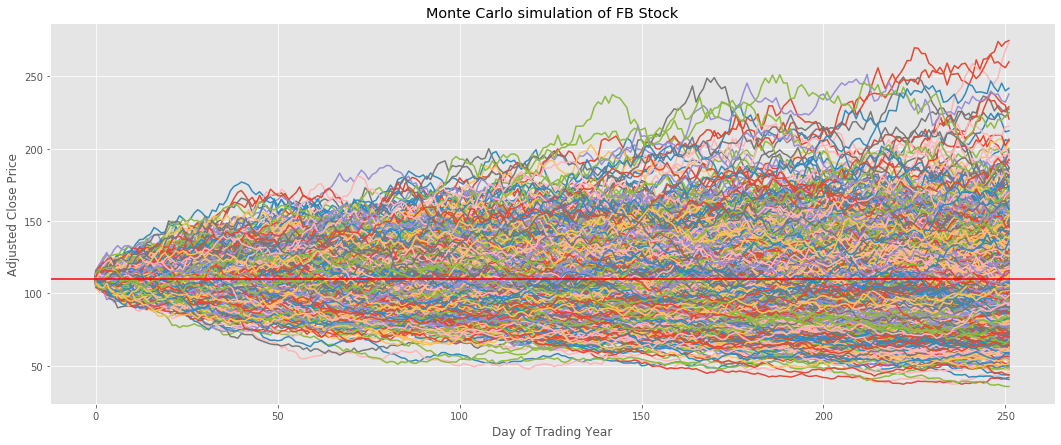

In [ ]:
fig = plt.figure(figsize=(18,7))
plt.title('Monte Carlo simulation of FB Stock')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day of Trading Year')
plt.ylabel('Adjusted Close Price')

plt.show()